## Observations and Insights 

In [185]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset

mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

mouse_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [344]:
# Checking the number of mice.

unique_mice = len(mouse_study_merged["Mouse ID"].unique())



total_mice = len(mouse_study_merged["Mouse ID"])
total_mice
print(f'There are {unique_mice} unique mice out of {total_mice} total mice experiments')

There are 249 unique mice out of 1893 total mice experiments


In [345]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


mouse_duplicate = mouse_study_merged.duplicated(subset=['Mouse ID', 'Timepoint'])

print(mouse_duplicate.sum())



#mouse_study_merged(mouse_study_merged.duplicated(subset=['Mouse ID', 'Timepoint']), keep=False)

#mouse_study_merged()

#mouse_duplicated_df = [mouse_duplicate],keep=False


#print(mouse_duplicate_df)



5


In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_merged.loc[mouse_duplicate, :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [269]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#mouse_study_merged.loc[mouse_study_merged.duplicated(keep= False)]
no_mouse_duplicate_df = mouse_study_merged.loc[mouse_study_merged["Mouse ID"]!="g989"]

len(no_mouse_duplicate_df["Mouse ID"].unique())

#no_mouse_duplicate_df

#unique_mice1 = len(no_mouse_duplicate_df["Mouse ID"].unique())




248

In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_regimen_stat = no_mouse_duplicate_df.groupby(['Drug Regimen'])


mean_tumor = drug_regimen_stat.mean()
mean_tumor_short= mean_tumor[['Tumor Volume (mm3)']]
mean_tumor_short.columns = ['Mean Tumor Volume']
mean_tumor_short


#median_tumor = drug_regimen_stat.median()

median_tumor = drug_regimen_stat.median()
median_tumor_short= median_tumor[['Tumor Volume (mm3)']]
median_tumor_short.columns = ['Median Tumor Volume']
median_tumor_short

#variance_tumor = drug_regimen_stat.var()

var_tumor = drug_regimen_stat.var()
var_tumor_short= var_tumor[['Tumor Volume (mm3)']]
var_tumor_short.columns = ['Variance Tumor Volume']
var_tumor_short

#stand_err_tumor = drug_regimen_stat.std()
std_tumor = drug_regimen_stat.std()
std_tumor_short= std_tumor[['Tumor Volume (mm3)']]
std_tumor_short.columns = ['StandardError Tumor Volume']
std_tumor_short


#standard_err_tumor = drug_regimen_stat.sem()
sem_tumor = drug_regimen_stat.sem()
sem_tumor_short= sem_tumor[['Tumor Volume (mm3)']]
sem_tumor_short.columns = ['StdErrMean Tumor Volume']
sem_tumor_short


#standard_err_tumor

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_data_merge1 = pd.merge(mean_tumor_short, median_tumor_short, on="Drug Regimen")
tumor_data_merge1

tumor_data_merge2 = pd.merge(tumor_data_merge1, var_tumor_short, on="Drug Regimen")
tumor_data_merge2

tumor_data_merge3 = pd.merge(tumor_data_merge2, std_tumor_short, on="Drug Regimen")
tumor_data_merge3

tumor_data_merge_df = pd.merge(tumor_data_merge3, sem_tumor_short, on="Drug Regimen")
tumor_data_merge_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,StandardError Tumor Volume,StdErrMean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_tumor = no_mouse_duplicate_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

summary_tumor


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [285]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_graph = no_mouse_duplicate_df.groupby(['Drug Regimen']).count()

drug_regimen_graph_no_index = no_mouse_duplicate_df.groupby(['Drug Regimen'], as_index=False).count()

regimen_timecount_df = drug_regimen_graph[["Timepoint"]]

regimen_timecount_df_ni = drug_regimen_graph_no_index[["Drug Regimen","Timepoint"]]

regimen_timecount_df_ni




,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


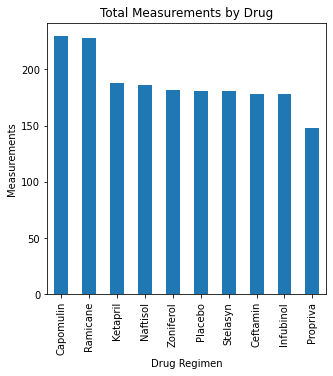

<Figure size 432x288 with 0 Axes>

In [286]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


regimen_timecount_df = drug_regimen_graph[["Timepoint"]]

regimen_timecount_df

sorted_regimen_df = regimen_timecount_df.sort_values('Timepoint', ascending=False)

sorted_regimen_df.plot(kind="bar", figsize=(5,5), legend=None)

# Set a title for the chart
plt.title("Total Measurements by Drug")
plt.ylabel("Measurements")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Measurements')

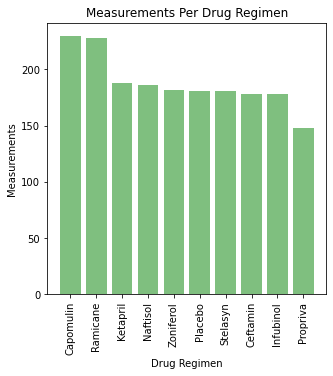

In [287]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.bar
#set x axis and tick locations
sorted_regimen_timecount_df_ni = regimen_timecount_df_ni.sort_values('Timepoint', ascending=False)

#plt.bar()
#regimen_timecount_df_ni

x_axis = np.arange(len(sorted_regimen_timecount_df_ni))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(5,5))
plt.bar(x_axis, sorted_regimen_timecount_df_ni["Timepoint"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, sorted_regimen_timecount_df_ni["Drug Regimen"], rotation="vertical")
plt.title("Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")

In [288]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


no_mouse_duplicate_df

male_mice = no_mouse_duplicate_df[no_mouse_duplicate_df["Sex"] == "Male"]
male_mice_number = len(male_mice)
male_mice_number

female_mice = no_mouse_duplicate_df[no_mouse_duplicate_df["Sex"] == "Female"]
female_mice_number = len(female_mice)
female_mice_number

mf_pie_graph_info = pd.DataFrame({
                                "Number": [male_mice_number, female_mice_number]},
                                index=["Male", "Female"])


mf_pie_graph_info




,Number
Male,958
Female,922


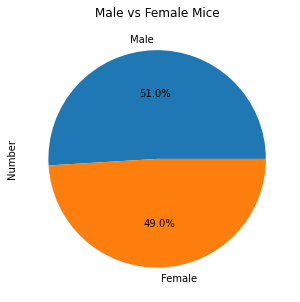

<Figure size 432x288 with 0 Axes>

In [289]:
mf_pie_graph_info.plot.pie(y="Number", figsize=(5,5), autopct="%1.1f%%", legend=None)


plt.title("Male vs Female Mice")
plt.ylabel("Number")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number')

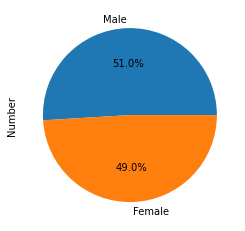

In [290]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_pie_graph_info1 = pd.DataFrame({
                                "Sex": ["Male", "Female"], 
                                "Number": [male_mice_number, female_mice_number]
                            
                             
})

mice_values = mf_pie_graph_info1["Number"]
mice_labels = mf_pie_graph_info1["Sex"]

plt.pie(mice_values, labels=mice_labels, autopct="%1.1f%%")
plt.ylabel("Number")

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_time = no_mouse_duplicate_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_time

max_tumor_time = max_tumor_time.reset_index()
max_tumor_time
#time_mouse_df = no_mouse_duplicate_df[["Mouse ID", "Timepoint"]]
#time_mouse_df

#max_tumor_time = time_mouse_df.groupby(["Mouse ID"], as_index=False)
#max_tumor_time.max()

#max_mouse_df = no_mouse_duplicate_df.groupby(["Mouse ID"], as_index = False)
#max_mouse_df.max()

max_time_merged = pd.merge(max_tumor_time, no_mouse_duplicate_df, on=["Mouse ID", "Timepoint"])
max_time_merged

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 of Capomulin could be outliers.
Values above 51.83201549 of Capomulin could be outliers.


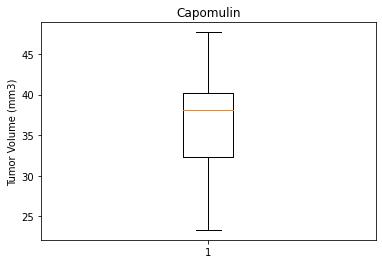

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 of Ramicane could be outliers.
Values above 54.30681135 of Ramicane could be outliers.


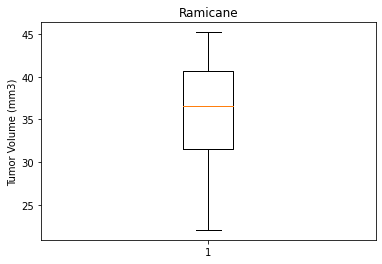

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 of Infubinol could be outliers.
Values above 82.74144559000001 of Infubinol could be outliers.


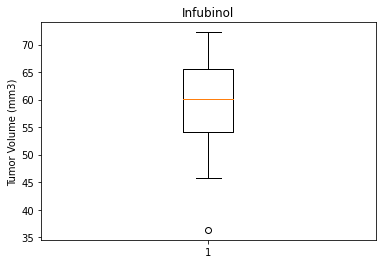

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 of Ceftamin could be outliers.
Values above 87.66645829999999 of Ceftamin could be outliers.


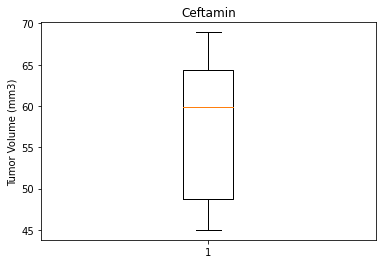

In [140]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 
for treatment in regimen_treatments:
    drug_volume = max_time_merged.loc[max_time_merged["Drug Regimen"] == treatment]
    tumor_data.append(drug_volume) 


    # Determine outliers using upper and lower bounds
    quartiles = drug_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} of {treatment} could be outliers.")
    print(f"Values above {upper_bound} of {treatment} could be outliers.")
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    fig1, ax1 = plt.subplots()
    ax1.set_title(treatment)
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(drug_volume["Tumor Volume (mm3)"])
    plt.show()
    


array(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], dtype=object)

## Line and Scatter Plots

In [138]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
capomulin_df = no_mouse_duplicate_df.loc[no_mouse_duplicate_df["Drug Regimen"] == "Capomulin", :]
capomulin_df  

#s185
mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", :]
mouse_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<function matplotlib.pyplot.show(close=None, block=None)>

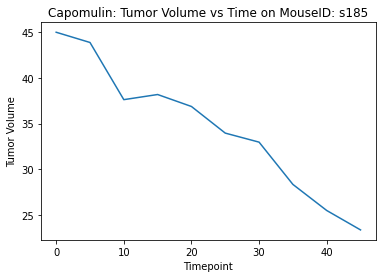

In [139]:
plt.title("Capomulin: Tumor Volume vs Time on MouseID: s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"])
plt.show

In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
gby_capomulin = capomulin_df.groupby(["Mouse ID"])

avg_tumor_capomulin_df = gby_capomulin.mean()
avg_tumor_capomulin_df



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<function matplotlib.pyplot.show(close=None, block=None)>

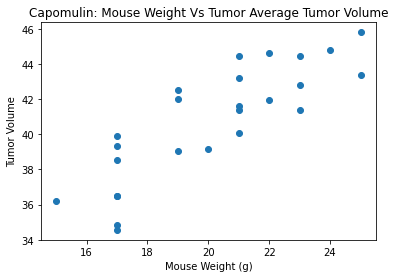

In [124]:
plt.title("Capomulin: Mouse Weight Vs Tumor Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume")
plt.xlim()

plt.scatter(avg_tumor_capomulin_df["Weight (g)"], avg_tumor_capomulin_df["Tumor Volume (mm3)"])
plt.show

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7088568047708717


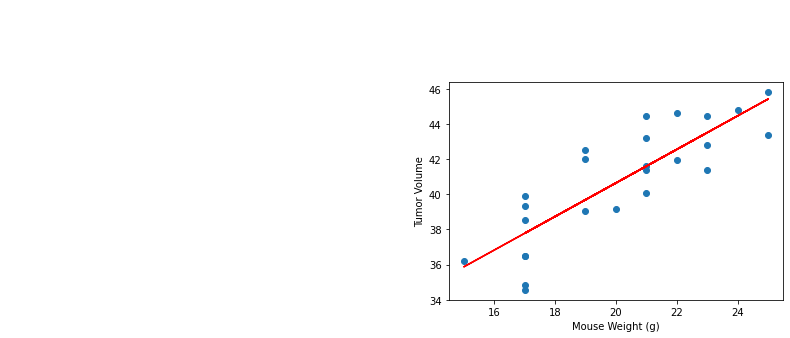

In [135]:
from scipy.stats import linregress

x_values = avg_tumor_capomulin_df['Weight (g)']
y_values = avg_tumor_capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()
